# LAB 2 : Hawkes Process and HF Data

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import norm
import scipy.stats as stats
from datetime import timedelta

# 1. Implementation of fundamental routines

Recall that a counting process $N$ is called a Hawkes process if it is a counting process with (stochastic) intensity:

$\lambda_t = \lambda_{0}(t) + \int_{0}^{t}v(t-s)dN_s = \lambda_{0}(t) + \displaystyle\sum_{0<t_{i}<t}v(t-t_i)$. 

The exponential kernel is communly used: $v(t) = \displaystyle \sum_{j=1}^{P}\alpha_{j}e^{-\beta_{j}t}1_{\mathbb{R_{+}}}(t)$ for a P-dimension.


**(a) Computing the Hawkes process**

In [2]:
def hawkes_process(lambda0, alpha, beta, T):
    t = []
    lambd = lambda0
    n = 1
    u = np.random.random()
    s = -np.log(u)/lambd
    if s <= T:
        t.append(s)
    else:
        return t
    n += 1
    lambd = lambda0
    for j in range(len(alpha)):
        lambd += alpha[j]
    H = lambd - lambda0
    u = np.random.random()
    s -= np.log(u)/lambd
    while s <= T:
        d = np.random.random()
        H1 = H
        for j in range(len(alpha)):
            H1 = H1*np.exp(-beta[j]*(s - t[-1]))
        lambdaS = lambda0 + H1
        if d <= lambdaS/lambd:
            t.append(s)
            n += 1
            lamb = lambdaS
            H = H1
            for j in range(len(alpha)):
                lambd += alpha[j]
                H += alpha[j]
        else:
            lambd = lambdaS
        u = np.random.random()
        s -= np.log(u)/lambd
    return t

Runing several simulations.

In [10]:
l = []
for i in range(1000):
    t = hawkes_process(1.2,[0.6],[0.8],100)
    l.append(len(t))
print(np.mean(l))

460.213


We work under the hypothesis that the process is stationary. It is the case if the average number of points of a Hawkes process on a time interval of length $T$ is $\displaystyle \frac{\lambda_0 T}{1 - \frac{\alpha}{\beta}}$. Let us write a function that returns this theorical value and let us verify that our results converge when we multiply simulations. 

In [11]:
def average_number_theorical(lamb0,alpha,beta,T):
    res = (lamb0*T)/(1 - (alpha/beta))
    return round(res,3)

In [12]:
average_number_theorical(1.2,0.6,0.8,100)

480.0

In [13]:
# Une fonction qui multiplie les simulations et qui retourne le nombre moyen d'évènements 
# ainsi qu'un intervalle de confiance à 95% associé.
def average_number_empirical(lamb0,alpha,beta,T,n_simul):
    l_average = []
    l_vol = []
    for i in range(n_simul):
        a = hawkes_process(lamb0, alpha, beta, T)
        m = len(a)
        l_average.append(m)
    for i in range(n_simul):
        l_vol.append((l_average[i] - np.mean(l_average))**2)
    IC = 1.96*np.sqrt(np.mean(l_vol))/(np.sqrt(n_simul))
    res = []
    res.append(np.mean(l_average))
    res.append(round(np.mean(l_average) - IC,3))
    res.append(round(np.mean(l_average) +IC,3))
    print('Mean of simulations:', res[0])
    print('--------')
    print('95% Confidence Interval:','[',res[1],',',res[2],']')
    return res

In [14]:
average_number_empirical(1.2,[0.6],[0.8],1000,10)

Mean of simulations: 4767.1
--------
95% Confidence Interval: [ 4550.366 , 4983.834 ]


[4767.1, 4550.366, 4983.834]

**Ploting the evolution of the confidence interval.**

In [15]:
d_est = {}
d_inf = {}
d_sup = {}
l_est = []

for i in range(1000,10000,1000):
    a = average_number_empirical(1.2,[0.6],[0.8],100,i)
    d_est[i] = a[0]
    l_est.append(a[0])
    d_inf[i] = a[1]
    d_sup[i] = a[2]

Mean of simulations: 461.933
--------
95% Confidence Interval: [ 456.672 , 467.194 ]
Mean of simulations: 462.5505
--------
95% Confidence Interval: [ 458.775 , 466.326 ]
Mean of simulations: 461.532
--------
95% Confidence Interval: [ 458.56 , 464.504 ]
Mean of simulations: 461.8455
--------
95% Confidence Interval: [ 459.28 , 464.411 ]
Mean of simulations: 460.4776
--------
95% Confidence Interval: [ 458.17 , 462.785 ]
Mean of simulations: 461.9266666666667
--------
95% Confidence Interval: [ 459.835 , 464.018 ]
Mean of simulations: 462.023
--------
95% Confidence Interval: [ 460.071 , 463.975 ]
Mean of simulations: 461.224375
--------
95% Confidence Interval: [ 459.382 , 463.067 ]
Mean of simulations: 461.38233333333335
--------
95% Confidence Interval: [ 459.671 , 463.094 ]


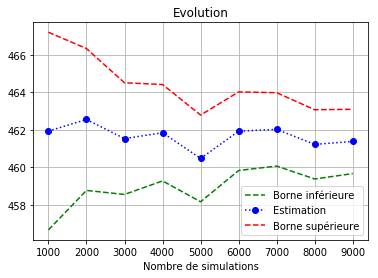

In [16]:
inf = np.array(d_inf.values())
sup = np.array(d_sup.values())
plt.plot(d_est.keys(), d_inf.values(), 'r--', color = 'g', label = 'Borne inférieure')
plt.plot(d_est.keys(), d_est.values(),'b:o', color = 'b', label = 'Estimation')
#plt.plot(d_est.keys(), mean_simule, color = 'k', label = 'Moyenne des estimations')
plt.plot(d_est.keys(), d_sup.values(), 'r--', color = 'r', label = 'Borne supérieure')
plt.title('Evolution')
plt.legend(loc='lower right')
plt.xlabel('Nombre de simulations')
plt.grid(True)
plt.show()

**Notes:**

We seem to get a good approximation of $\frac{\lambda_0 T}{1 - \alpha/\beta}$ when $T$ is big enough (doesn't work well when $T=10$ but starts to work well for $T=100$) so that suggests we don't have a stationary process for $T$ small? 



**Coding the Kernel Function**

Recall that a counting process $N$ is called a Hawkes process if it is a counting process with (stochastic) intensity:

$\lambda_t = \lambda_{0}(t) + \int_{0}^{t}v(t-s)dN_s = \lambda_{0}(t) + \displaystyle\sum_{0<t_{i}<t}v(t-t_i)$. 

The exponential kernel is communly used: $v(t) = \sum_{j=1}^{P}\alpha_{j}e^{-\beta_{j}t}1_{\mathbb{R_{+}}}(t)$ for a P-dimension.


In [17]:
def kernel1D(alpha,beta,t):
    return alpha*np.exp(-beta*t)

def lambdaa(lamb0,alpha,beta,t,s):
    somme = lamb0
    for i in range(len(t)):
        if s >= t[i]:
            somme += kernel1D(alpha,beta,s-t[i])
        else:
            break
    return somme

**Plotting the Hawkes process and intensities**

In [22]:
t = hawkes_process(1.2,[0.6],[0.8],1000)
len(t)

4472

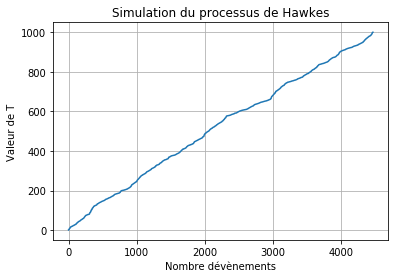

In [23]:
plt.plot(t)
plt.grid(True)
plt.title('Simulation du processus de Hawkes')
plt.xlabel('Nombre dévènements')
plt.ylabel('Valeur de T')
plt.show()

In [24]:
x = np.linspace(0,10,100)
l_y = []
for i in range(len(x)):
    l_y.append(lambdaa(1.2,0.6,0.8,t,x[i]))


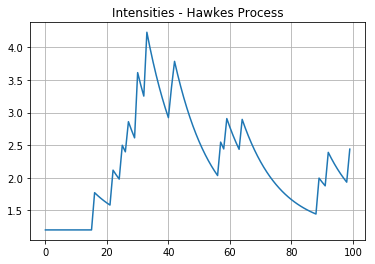

In [25]:
plt.plot(l_y)
plt.title('Intensities - Hawkes Process')
plt.grid(True)
plt.show()

In [26]:
# Implementing the P Kernel Function
def kernel(alpha,beta,t,P):
    somme = 0
    for i in range(P):
        somme += alpha[i]*np.exp(-beta[i]*t)
    return somme

In [27]:
def kernel1D(alpha,beta,t):
    return alpha * np.exp(- beta * t)

**(b) Let us compute the log-likelihood, defined by**

$\log \left(\mathcal{L}_{T}\right) = \displaystyle - \int_{0}^{T}\lambda_{0}(s)ds - \sum_{i=1}^{n}\sum_{j=1}^{p}\frac{\alpha_{j}}{\beta_{j}}\left(1 - e^{-\beta_{j}(T-t_i)}\right) + \sum_{i=1}^{n} \log\left[\lambda_{0}(t_i)) + \sum_{j=1}^{P}\alpha_{j}R_{j}(i)\right]$. Here, $\lambda_0$ is a constant and $P=1$ so one can rewrite: 

$\log \left(\mathcal{L}_{T}\right) = \displaystyle - T \times \lambda_{0} - \sum_{i=1}^{n}\frac{\alpha}{\beta}\left(1 - e^{-\beta(T-t_i)}\right) + \sum_{i=1}^{n} \log \left(\lambda_0 + \alpha R\right)$.

$R$ is defined recursively by $R(1) = 0$ and $R(i) = e^{- \beta(t_i - t_{i-1})}(1+R(i-1))$.





In [28]:
def loglikelihood(x,T,l_time):
    lambda0 = x[0]
    alpha = [x[1]]
    beta = [x[2]]
    a = - T*lambda0
    somme1 = 0
    for i in range(len(l_time)):
        for j in range(len(alpha)):
            somme1 += (alpha[j]/beta[j])*(1 - np.exp(-beta[j]*(T-l_time[i])))
    somme2 = 0
    for j in range (len(alpha)):
        l_R = [0]
        for i in range(1,len(l_time)-1):
            R = np.exp(-beta[j]*(l_time[i] - l_time[i-1]))*(1+l_R[-1])
            l_R.append(R)
            somme2 += np.log(lambda0 + alpha[j]*R)
    res = a - somme1 + somme2
    #print('Values of lambda0,alpha,beta are %s %s %s' %(x[0], [x[1]], [x[2]]))
    #print('Value of the log-likelihood is:', res)
    return res
    

In [38]:
t = hawkes_process(1.2,[0.6],[0.8],100)

In [39]:
l = [1.2,0.6,0.8]

In [40]:
a = loglikelihood(l,100,t)
a

121.9697151636147

**(c) Computing estimated values of the parameters**

In [41]:
from scipy.optimize import minimize
import scipy.optimize as opt

In [42]:
def maximumparameters(P,T,events):
    def loglike(x):
        b = []
        b.append(x[0])
        b.append(x[1:P + 1])
        b.append(x[(P+1):2*P+1])
        return -loglikelihood(b,T,events)[0]
    a = np.ones(2*P+1)
    sol = minimize(loglike,a,method = 'SLSQP',bounds=opt.Bounds(np.zeros(2*P+1),np.inf*np.ones(2*P+1),keep_feasible=False))
    ans = sol.x
    para = []
    para.append(ans[0])
    a1 = ans[1:P+1].tolist()
    a2 = ans[(P+1):2*P+1].tolist()
    l1 = []
    for elem in a1:
        l1.append(round(elem,2))
    l2 = []
    for elem in a2:
        l2.append(round(elem,2))
    para.append(l1)
    para.append(l2)
    #print('Liste des paramètres estimés :', para)
    return para

In [43]:
t = hawkes_process(1.2,[0.6 ,0.7],[0.8, 0.7],100)

In [44]:
maximumparameters(2,100,t)

[1.5213438735015943, [1.5, 1.0], [1.78, 1.0]]

**(d) Integrated intensity for a Hawkes process**

For a one-dimensional Hawkes process with exponential kernels ($P=1$):

$\forall i, \Lambda(t_{i-1},t_i) = \displaystyle \int_{t_{i-1}}^{t_i}\lambda_{0}ds + \frac{\alpha}{\beta}\left(1 - e^{-\beta(t_i - t_{i-1})}\right)A(i-1)$, $A$ being defined by $A(1) = 1$ and $A(i-1) = 1 + e^{-\beta(t_{i-1}-t_{i-2})}A(i-2)$.

We will code it in two parts.

Firstly, we get the $A$ terms defined recursively above. 

In [45]:
def get_a(beta,t):
    res = [1]
    for i in range(2,len(t)):
        res.append(1+np.exp(-beta*(t[i]-t[i-1]))*res[-1])
    return res

Then we compute the series of integrated intensities.

In [46]:
def int_intens(parameters,T,l_time):
    lambda0 = parameters[0]
    alpha = [parameters[1]]
    beta = [parameters[2]]
    res_final=np.zeros(len(l_time)-1)
    for j in range(len(alpha)):
        # Calculating the 'A' components
        l_a = get_a(beta[j],t)
        l_part2 = (alpha[j])/(beta[j])*(1 + np.exp(-beta[j]*np.diff(l_time)))*np.asarray(l_a)
        # Adding to the final result
        res_final=res_final+l_part2
    res1 = lambda0*(np.diff(l_time))       
    res_final=res_final+res1
    return res_final

In [47]:
l = [1.2,0.6,0.8]
t = hawkes_process(1.2,[0.6],[0.8],100000)

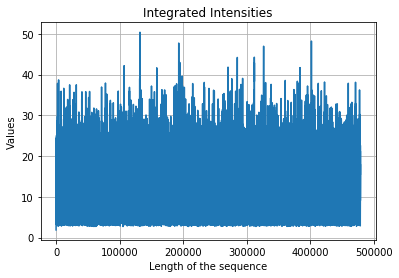

In [48]:
a = int_intens(l,100,t)
plt.plot(a)
plt.title('Integrated Intensities')
plt.grid(True)
plt.ylabel('Values')
plt.xlabel('Length of the sequence')
plt.show()

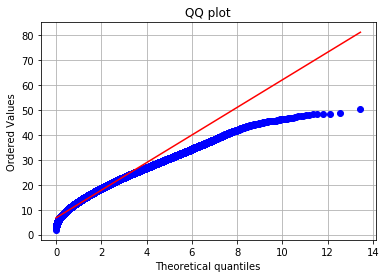

In [50]:
import pylab
stats.probplot(a, dist = "expon", plot = pylab)
pylab.title('QQ plot')
pylab.grid(True)
pylab.show()

# 2. Sanity Check.

**(a) Simulating 'N' paths**

In [51]:
# A function so the user can compute the desired number of simulations.
def simulation_q1d(n_simul):
    l_estimates_lambda0 = []
    l_estimates_alpha = []
    l_estimates_beta = []
    for i in range(n_simul):
        t = hawkes_process(1.2,[0.6],[0.8],100)
        a = maximumparameters(1,100,t)
        l_estimates_lambda0.append(a[0])
        l_estimates_alpha.append(a[1][0])
        l_estimates_beta.append(a[2][0])
    res = [round(np.mean(l_estimates_lambda0),2),round(np.mean(l_estimates_alpha),2),round(np.mean(l_estimates_beta),2)]
    print('True values', 1.2,0.6,0.8)
    print('Estimators', res)
    return res
    

In [53]:
a = simulation_q1d(100)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


True values 1.2 0.6 0.8
Estimators [1.29, 0.61, 0.86]


**(b) QQ-plot and visualization of the goodness-of-fit**.

Obtaining the fitted process with the estimated parameters.

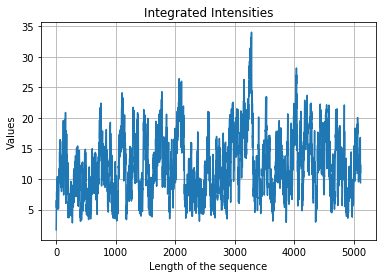

In [34]:
l = [a[i] for i in range(len(a))] # list of estimated parameters
t = hawkes_process(1.2,[0.6],[0.8],1000)
a = int_intens(l,100,t)
plt.plot(a)
plt.title('Integrated Intensities')
plt.xlabel('Length of the sequence')
plt.ylabel('Values')
plt.grid(True)
plt.show()

**QQ-plot and goodness-of-fit visualization:**

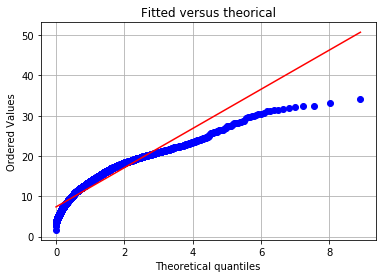

In [35]:
stats.probplot(a, dist = "expon", plot = pylab)
pylab.title('Fitted versus theorical')
pylab.grid(True)

# 3. Analysis of high-frequency trades data

## 3. (a) Total- day 3

Loading data and realizing the tasks for Total.

In [54]:
from datetime import datetime
edf_trades = []
edf_quotes = []
renault_trades = []
renault_quotes = []
total_trades = []
total_quotes = []
edf_pre = "/Users/jeremymarck/Desktop/M2Finance/S2/HFLOB/TP/TP1/Data/EDF.PA-201509"
renault_pre = "/Users/jeremymarck/Desktop/M2Finance/S2/HFLOB/TP/TP1/Data/RENA.PA-201509"
total_pre = "/Users/jeremymarck/Desktop/M2Finance/S2/HFLOB/TP/TP1/Data/TOTF.PA-201509"
end_quote = "-Quotes.csv.gz"
end_trade = "-Trades.csv.gz"
for i in range(30):
    day = i+1
    if day < 10:
        date = datetime.strptime('2015-09-'+'0'+str(day),'%Y-%m-%d')
        if date.weekday() < 5:
            trades_edf = pd.read_csv(edf_pre +'0' + str(day) + end_trade)
            trades_rena = pd.read_csv(renault_pre + '0' + str(day) + end_trade)
            trades_totf = pd.read_csv(total_pre + '0' + str(day) + end_trade)
            quotes_edf = pd.read_csv(edf_pre +'0' + str(day) + end_quote)
            quotes_rena = pd.read_csv(renault_pre +'0'+ str(day) + end_quote)
            quotes_totf = pd.read_csv(total_pre +'0'+ str(day) + end_quote)
        else:
            continue
    else:
        date = datetime.strptime('2015-09-'+str(day),'%Y-%m-%d')
        if date.weekday() < 5:
            trades_edf = pd.read_csv(edf_pre + str(day) + end_trade)
            trades_rena = pd.read_csv(renault_pre + str(day) + end_trade)
            trades_totf = pd.read_csv(total_pre + str(day) + end_trade)
            quotes_edf = pd.read_csv(edf_pre + str(day) + end_quote)
            quotes_rena = pd.read_csv(renault_pre + str(day) + end_quote)
            quotes_totf = pd.read_csv(total_pre + str(day) + end_quote)
        else:
            continue
    trades_edf['date_delta'] = pd.to_timedelta(trades_edf['date_xl'],unit = 'D') + datetime(1900,1,1)
    trades_edf['ts_delta'] = pd.to_timedelta(trades_edf['ts'],unit='s')
    trades_totf['date_delta'] = pd.to_timedelta(trades_totf['date_xl'],unit='D')+datetime(1900,1,1)
    trades_totf['ts_delta'] = pd.to_timedelta(trades_totf['ts'],unit='s')
    trades_rena['date_delta'] = pd.to_timedelta(trades_rena['date_xl'],unit='D')+datetime(1900,1,1)
    trades_rena['ts_delta'] = pd.to_timedelta(trades_rena['ts'],unit='s')
    quotes_edf['date_delta']= pd.to_timedelta(quotes_edf['date_xl'],unit='D')+datetime(1900,1,1)
    quotes_edf['ts_delta'] = pd.to_timedelta(quotes_edf['ts'],unit='s')
    quotes_totf['date_delta'] = pd.to_timedelta(quotes_totf['date_xl'],unit='D')+datetime(1900,1,1)
    quotes_totf['ts_delta'] = pd.to_timedelta(quotes_totf['ts'],unit='s')
    quotes_rena['date_delta'] = pd.to_timedelta(quotes_rena['date_xl'],unit='D')+datetime(1900,1,1)
    quotes_rena['ts_delta'] = pd.to_timedelta(quotes_rena['ts'],unit='s')
    trades_edf = trades_edf[trades_edf['lastFtxt'] == 'normal']
    trades_totf = trades_totf[trades_totf['lastFtxt'] == 'normal']
    trades_rena = trades_rena[trades_rena['lastFtxt'] == 'normal']
    trades_edf = trades_edf.reset_index()
    del trades_edf['index']
    trades_totf = trades_totf.reset_index()
    del trades_totf['index']
    trades_rena = trades_rena.reset_index()
    del trades_rena['index']
    quotes_edf = quotes_edf[quotes_edf['ts'] >= trades_edf['ts'][0]]
    quotes_edf = quotes_edf[quotes_edf['ts'] <= trades_edf['ts'][len(trades_edf)-1]]
    quotes_totf = quotes_totf[quotes_totf['ts'] >= trades_totf['ts'][0]]
    quotes_totf = quotes_totf[quotes_totf['ts'] <= trades_totf['ts'][len(trades_totf)-1]]
    quotes_rena = quotes_rena[quotes_rena['ts'] >= trades_rena['ts'][0]]
    quotes_rena = quotes_rena[quotes_rena['ts'] <= trades_rena['ts'][len(trades_rena)-1]]
    edf_trades.append(trades_edf)
    edf_quotes.append(quotes_edf)
    total_trades.append(trades_totf)
    total_quotes.append(quotes_totf)
    renault_trades.append(trades_rena)
    renault_quotes.append(quotes_rena)

In [55]:
test = total_trades[3]

Let us fit Poisson and Hawkes models ($P=1$ for Hawkes model and exponential kernel) and plot the distributions of time intervals for the fitted processes. 

In [66]:
a = (test['ts_delta']-test['ts_delta'][0])/np.timedelta64(1,'s')
a = a.to_numpy()
a = np.unique(a)

In [67]:
b = maximumparameters(1,round(a[-1]),a)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [68]:
# poisson process is a Hawkes process with alpha = 0
lamda_poisson = len(a)/(a[-1])
p = hawkes_process(lamda_poisson,[0],[0],round(a[-1]))
t = hawkes_process(b[0],b[1],b[2],round(a[-1]))

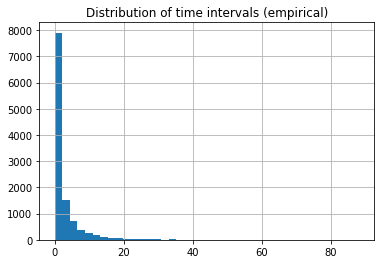

In [74]:
plt.hist(np.diff(a),40)
plt.title ('Distribution of time intervals (empirical)')
plt.grid(True)
plt.show()

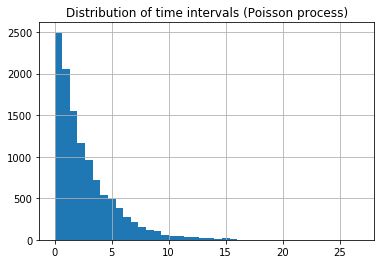

In [72]:
plt.hist(np.diff(p),40)
plt.title ('Distribution of time intervals (Poisson process)')
plt.grid(True)
plt.show()

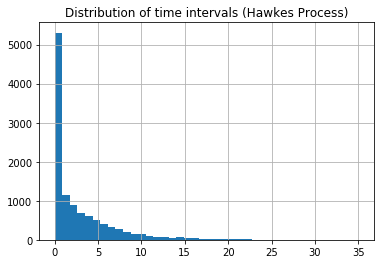

In [73]:
plt.hist(np.diff(t),40)
plt.title ('Distribution of time intervals (Hawkes Process)')
plt.grid(True)
plt.show()

Performing QQ-plots.

In [75]:
minlen = min(len(t),len(p),len(a))
d = p[:minlen]
h = t[:minlen]
k = a[:minlen]

Text(0.5, 1.0, 'Q-Q plot of time (Empirical vs Poisson)')

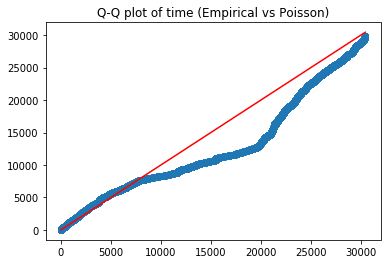

In [76]:
plt.scatter(k,d)
plt.plot(k,k,color='r')
plt.title ('Q-Q plot of time (Empirical vs Poisson)')

Text(0.5, 1.0, 'Q-Q plot of time (Empirical vs Hawkes)')

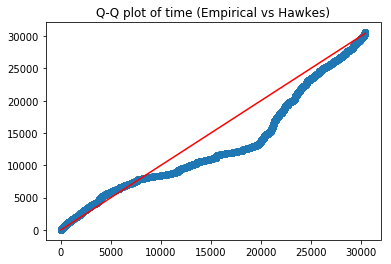

In [77]:
plt.scatter(k,h)
plt.plot(k,k,color='r')
plt.title ('Q-Q plot of time (Empirical vs Hawkes)')

Hawkes process is a little better fitted than the Poisson one. 

## 3. (b) Repeating this analysis for other stocks and trading days.

**EDF.**

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


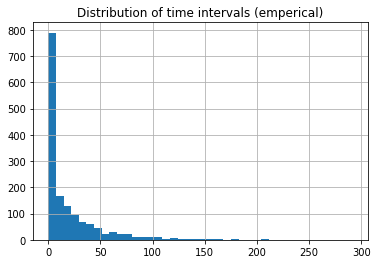

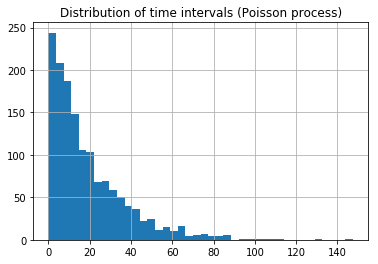

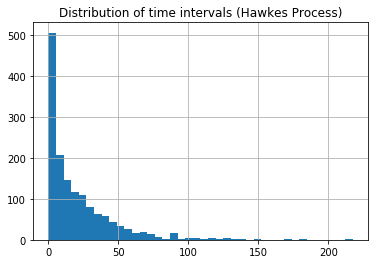

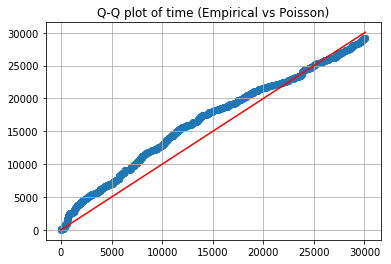

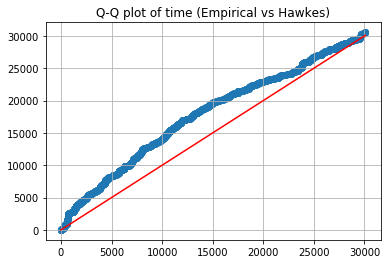

In [82]:
test = edf_trades[4]

a = (test['ts_delta']-test['ts_delta'][0])/np.timedelta64(1, 's')
a = a.to_numpy()
a = np.unique(a)

b = maximumparameters(1,round(a[-1]),a)

# poisson process is a Hawkes process with alpha = 0
lamda_poisson = len(a)/(a[-1])
p = hawkes_process(lamda_poisson,[0],[0],round(a[-1]))

t = hawkes_process(b[0],b[1],b[2],round(a[-1]))

plt.hist(np.diff(a),40)
plt.title ('Distribution of time intervals (emperical)')
plt.grid(True)
plt.show()

plt.hist(np.diff(d),40)
plt.title ('Distribution of time intervals (Poisson process)')
plt.grid(True)
plt.show()

plt.hist(np.diff(t),40)
plt.title ('Distribution of time intervals (Hawkes Process)')
plt.grid(True)
plt.show()

minlen = min(len(t),len(p),len(a))
d = p[:minlen]
h = t[:minlen]
k = a[:minlen]

plt.scatter(k,d)
plt.plot(k,k,color = 'r')
plt.title ('Q-Q plot of time (Empirical vs Poisson)')
plt.grid(True)
plt.show()

plt.scatter(k,h)
plt.plot(k,k,color='r')
plt.title ('Q-Q plot of time (Empirical vs Hawkes)')
plt.grid(True)
plt.show()

Poisson process seems to be quite better right now.

## Renault- day 5

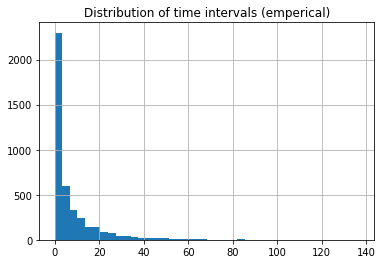

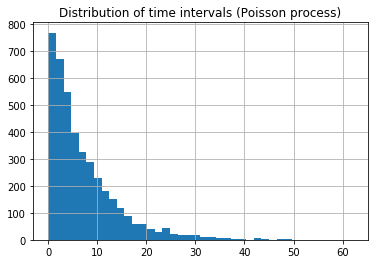

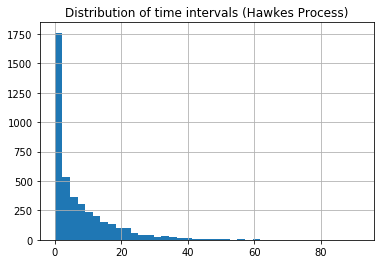

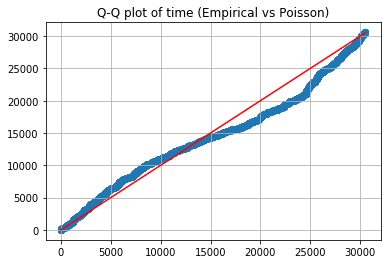

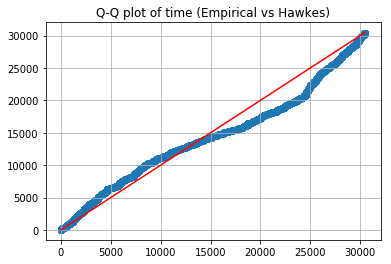

In [84]:
test = renault_trades[5]

a = (test['ts_delta']-test['ts_delta'][0])/np.timedelta64(1, 's')
a = a.to_numpy()
a = np.unique(a)

b = maximumparameters(1,round(a[-1]),a)

# poisson process is a Hawkes process with alpha = 0
lamda_poisson = len(a)/(a[-1])
p = hawkes_process(lamda_poisson,[0],[0],round(a[-1]))

t = hawkes_process(b[0],b[1],b[2],round(a[-1]))

plt.hist(np.diff(a),40)
plt.title ('Distribution of time intervals (emperical)')
plt.grid(True)
plt.show()

plt.hist(np.diff(d),40)
plt.title ('Distribution of time intervals (Poisson process)')
plt.grid(True)
plt.show()

plt.hist(np.diff(t),40)
plt.title ('Distribution of time intervals (Hawkes Process)')
plt.grid(True)
plt.show()

minlen = min(len(t),len(p),len(a))
d = p[:minlen]
h = t[:minlen]
k = a[:minlen]

plt.scatter(k,d)
plt.plot(k,k,color ='r')
plt.title ('Q-Q plot of time (Empirical vs Poisson)')
plt.grid(True)
plt.show()

plt.scatter(k,h)
plt.plot(k,k,color = 'r')
plt.title ('Q-Q plot of time (Empirical vs Hawkes)')
plt.grid(True)
plt.show()

Hawkes and Poisson processes produce similar performances.

## 3. (c) Shorter period of trading day (10h30-12h30).

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


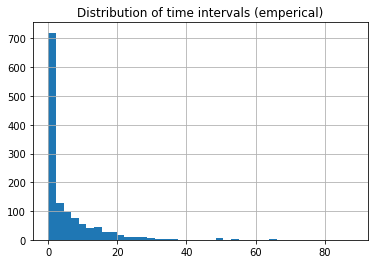

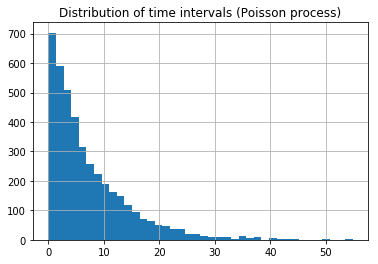

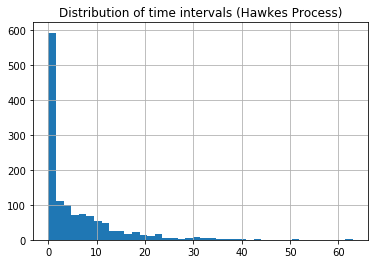

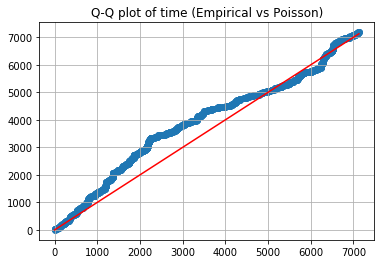

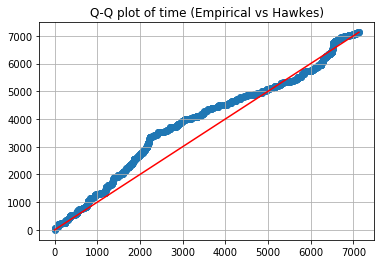

In [85]:
start_time = timedelta(hours = 10,minutes = 30)
end_time = timedelta(hours = 12,minutes = 30)
test = total_trades[3]
test = test[test['ts_delta'] > start_time]
test = test[test['ts_delta'] < end_time]
test = test.reset_index()
a = (test['ts_delta']-test['ts_delta'][0])/np.timedelta64(1, 's')
a = a.to_numpy()
a = np.unique(a)

b = maximumparameters(1,round(a[-1]),a)

# poisson process is a Hawkes process with alpha = 0
lamda_poisson = len(a)/(a[-1])
p = hawkes_process(lamda_poisson,[0],[0],round(a[-1]))

t = hawkes_process(b[0],b[1],b[2],round(a[-1]))

plt.hist(np.diff(a),40)
plt.title ('Distribution of time intervals (emperical)')
plt.grid(True)
plt.show()

plt.hist(np.diff(d),40)
plt.title ('Distribution of time intervals (Poisson process)')
plt.grid(True)
plt.show()

plt.hist(np.diff(t),40)
plt.title ('Distribution of time intervals (Hawkes Process)')
plt.grid(True)
plt.show()

minlen=min(len(t),len(p),len(a))
d=p[:minlen]
h=t[:minlen]
k=a[:minlen]

plt.scatter(k,d)
plt.plot(k,k,color='r')
plt.title ('Q-Q plot of time (Empirical vs Poisson)')
plt.grid(True)
plt.show()

plt.scatter(k,h)
plt.plot(k,k,color='r')
plt.title ('Q-Q plot of time (Empirical vs Hawkes)')
plt.grid(True)
plt.show()

## 3. (d) Repeating the analysis with different Kernel dimensions.

Please note that $P$ denotes the dimension. Everything is computed on EDF.

The following piece of code is a function that allows the user to choose the Kernel dimension.

In [87]:
def analysis(P):
    
    test = edf_trades[4]
    test = test.reset_index()
    a = (test['ts_delta']-test['ts_delta'][0])/np.timedelta64(1, 's')
    a = a.to_numpy()
    a = np.unique(a)
    
    # Choose your Kerne dimension here.
    b = maximumparameters(P,round(a[-1]),a)


    t = hawkes_process(b[0],b[1],b[2],round(a[-1]))

    plt.hist(np.diff(a),40)
    plt.title ('Distribution of time intervals (Empirical)')
    plt.grid(True)
    plt.show()
    
    plt.hist(np.diff(t),40)
    plt.title ('Distribution of time intervals (Hawkes Process)')
    plt.grid(True)
    plt.show()
    
    minlen = min(len(t),len(a))
    d = t[:minlen]
    k = a[:minlen]

    plt.scatter(k,d)
    plt.plot(k,k,color = 'r')
    plt.title ('Q-Q plot of time (emperical vs Hawkes)')
    plt.grid(True)
    plt.show()


P = 2.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


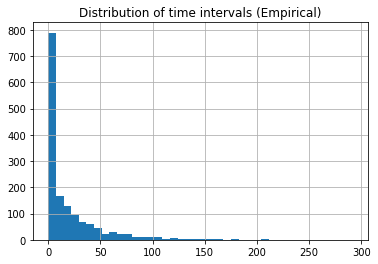

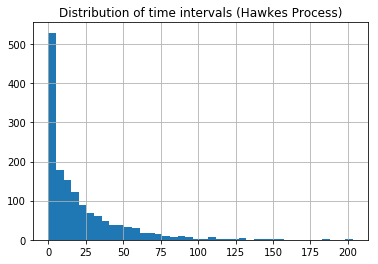

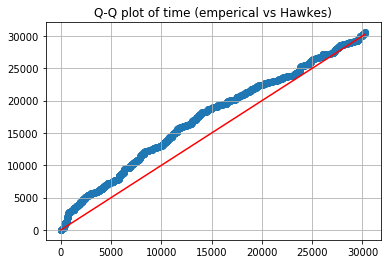

In [88]:
analysis(2)

P = 3.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


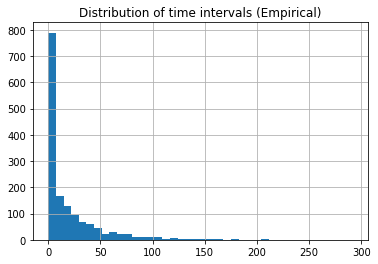

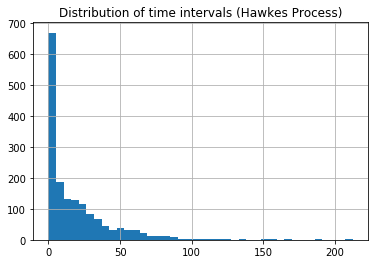

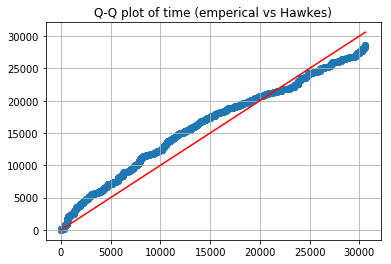

In [89]:
analysis(3)

P = 4.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


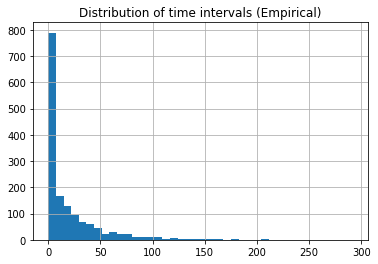

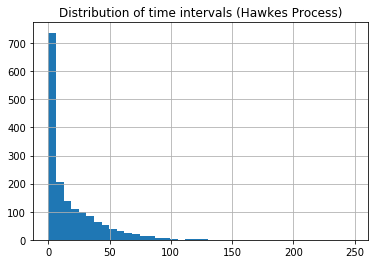

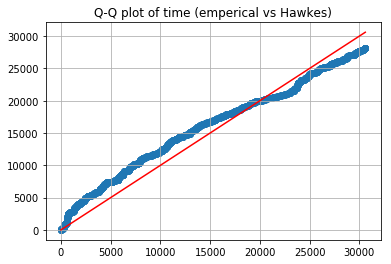

In [90]:
analysis(4)

Let us now purpose a function that returns the evolution of the fitting (QQ-plots) when $P$ increases.

In [99]:
def evolution(l):
    
    test = edf_trades[4]
    test = test.reset_index()
    a = (test['ts_delta']-test['ts_delta'][0])/np.timedelta64(1, 's')
    a = a.to_numpy()
    a = np.unique(a)
    
    for elem in l:
        print('**** P = %s ****' %(elem))
        b = maximumparameters(elem,round(a[-1]),a)
        t = hawkes_process(b[0],b[1],b[2],round(a[-1]))
        minlen = min(len(t),len(a))
        d = t[:minlen]
        k = a[:minlen]

        plt.scatter(k,d)
        plt.plot(k,k,color = 'r')
        plt.title ('Q-Q plot of time (emperical vs Hawkes)')
        plt.grid(True)
        plt.show()

**** P = 1 ****


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


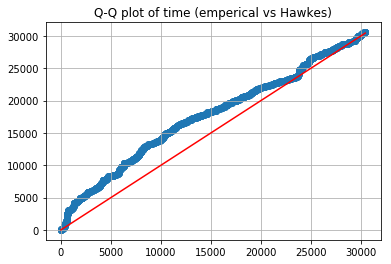

**** P = 2 ****


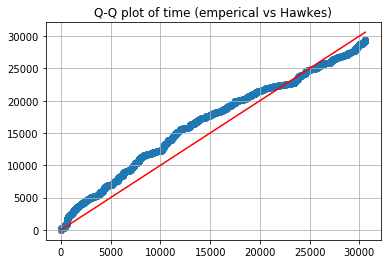

**** P = 3 ****


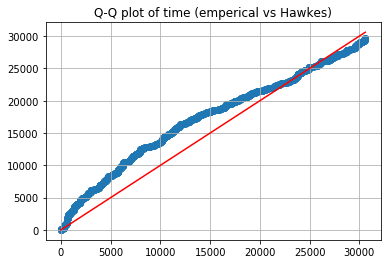

**** P = 4 ****


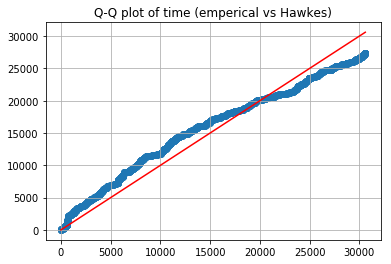

**** P = 5 ****


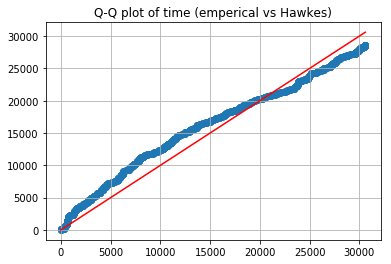

**** P = 6 ****


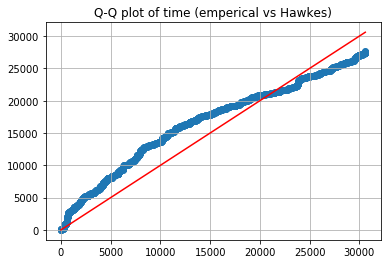

**** P = 7 ****


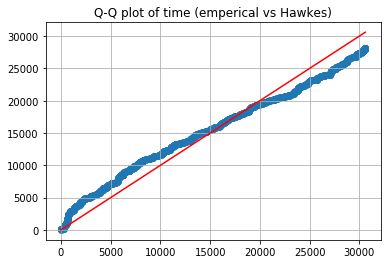

**** P = 8 ****


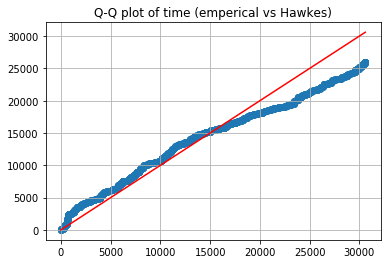

**** P = 9 ****


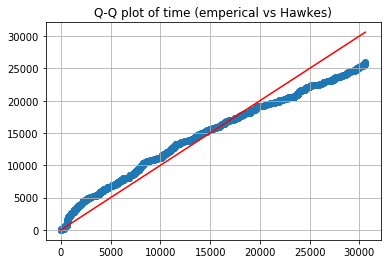

**** P = 10 ****


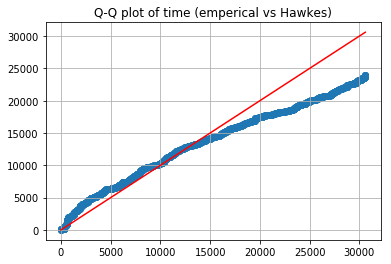

In [101]:
l_test = [i for i in range(1,11)]
evolution(l_test)